In [1]:
import pandas as pd
import numpy as np

In [2]:
#display dataframe
movie_type= pd.read_csv('data/tmdb.movies.csv.gz')
display(movie_type)
display(movie_type.info())

Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3                                         Toy Story      28.005   1995-11-22   
4                                         Inception      27.920   2010-07-16   
...                                             ...         ...          ...   
26512                         Laboratory Conditions       0.600   2018-10-13   
26513                               _EXHIBIT_84xxx_       0.600   2018-05-01   
26514                                  The Last One       0.600   2018-10-01   
26515                                  Trailer Made       0.600   2018-06-22   
26516                                    The Church       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[26517 rows x 10 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

**Observations & Insights:**
<ul></ul>
<li>There are 26517 total entries with 0 missing values.
<li>The vote count needs to be reduced to a more relevant number and discard outliers like 1
<li>The genre ids need to be changed to actual genres
<li>Reduce to movies in english 
<li>Reduce number of duplicate titles

In [3]:
#show when movies were released
movie_type.sort_values(by='release_date', ascending=False  )

Unnamed: 0                     genre_ids      id original_language  \
26057       26057  [27, 80, 80, 80, 80, 80, 80]  570704                en   
24265       24265                   [10749, 18]  428836                en   
24892       24892                          [99]  541577                en   
24819       24819                          [18]  481880                en   
24297       24297                          [18]  415085                en   
...           ...                           ...     ...               ...   
11192       11192               [18, 36, 10749]     887                en   
26345       26345                            []  316707                en   
3580         3580               [35, 18, 10749]  263768                fr   
21758       21758                      [27, 53]   43148                en   
14335       14335                   [18, 10752]     143                en   

                          original_title  popularity release_date  \
26057                  Murdery Christmas       0.840   2020-12-25   
24265                            Ophelia       8.715   2019-06-28   
24892            This Changes Everything       3.955   2019-06-28   
24819                      Trial by Fire       4.480   2019-05-17   
24297           All Creatures Here Below       8.316   2019-05-17   
...                                  ...         ...          ...   
11192        The Best Years of Our Lives       9.647   1946-12-25   
26345  How Walt Disney Cartoons Are Made       0.600   1939-01-19   
3580                          Le Bonheur       1.653   1936-02-27   
21758                    The Vampire Bat       2.292   1933-01-21   
14335     All Quiet on the Western Front       9.583   1930-04-29   

                                   title  vote_average  vote_count  
26057                  Murdery Christmas           0.0           1  
24265                            Ophelia           0.0           4  
24892            This Changes Everything           0.0           1  
24819                      Trial by Fire           7.0           3  
24297           All Creatures Here Below           5.0           5  
...                                  ...           ...         ...  
11192        The Best Years of Our Lives           7.8         243  
26345  How Walt Disney Cartoons Are Made           7.3           3  
3580                          Le Bonheur           8.7           3  
21758                    The Vampire Bat           5.6          23  
14335     All Quiet on the Western Front           7.8         299  

[26517 rows x 10 columns]

In [4]:
#filter for movies in english
movie_type= movie_type.loc[movie_type['original_language'] == "en"]
movie_type

Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3                                         Toy Story      28.005   1995-11-22   
4                                         Inception      27.920   2010-07-16   
...                                             ...         ...          ...   
26512                         Laboratory Conditions       0.600   2018-10-13   
26513                               _EXHIBIT_84xxx_       0.600   2018-05-01   
26514                                  The Last One       0.600   2018-10-01   
26515                                  Trailer Made       0.600   2018-06-22   
26516                                    The Church       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[23291 rows x 10 columns]

In [5]:
#condense data to get most voted on movies
movie_type_data= movie_type.loc[movie_type['vote_count'] >= 10000]
movie_type_data

Unnamed: 0          genre_ids      id original_language  \
0               0    [12, 14, 10751]   12444                en   
2               2      [12, 28, 878]   10138                en   
3               3    [16, 35, 10751]     862                en   
4               4      [28, 878, 12]   27205                en   
6               6  [28, 12, 14, 878]   19995                en   
...           ...                ...     ...               ...   
20729       20729           [27, 53]  346364                en   
23811       23811       [12, 28, 14]  299536                en   
23817       23817  [28, 12, 14, 878]  284054                en   
23819       23819   [28, 12, 35, 14]  284053                en   
24005       24005           [27, 53]  346364                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
2                                        Iron Man 2      28.515   2010-05-07   
3                                         Toy Story      28.005   1995-11-22   
4                                         Inception      27.920   2010-07-16   
6                                            Avatar      26.526   2009-12-18   
...                                             ...         ...          ...   
20729                                            It      13.966   2017-09-08   
23811                        Avengers: Infinity War      80.773   2018-04-27   
23817                                 Black Panther      44.140   2018-02-16   
23819                                Thor: Ragnarok      43.450   2017-11-03   
24005                                            It      13.966   2017-09-08   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
6                                            Avatar           7.4       18676  
...                                             ...           ...         ...  
20729                                            It           7.2       10931  
23811                        Avengers: Infinity War           8.3       13948  
23817                                 Black Panther           7.4       12365  
23819                                Thor: Ragnarok           7.5       11380  
24005                                            It           7.2       10931  

[72 rows x 10 columns]

In [6]:
movie_type_data["genre_ids"].iloc[0]

'[12, 14, 10751]'

In [7]:
#seperate genre ids with multiple values
movie_type_data.genre_ids = movie_type_data.genre_ids.map(lambda x:eval(x))

/Users/deja/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
movie_type_data = movie_type_data.explode("genre_ids")

In [9]:
#filter genres with few votes
movie_type_data= movie_type_data.loc[movie_type_data['genre_ids']<= 878]
movie_type_data

Unnamed: 0 genre_ids      id original_language  \
0               0        12   12444                en   
0               0        14   12444                en   
2               2        12   10138                en   
2               2        28   10138                en   
2               2       878   10138                en   
...           ...       ...     ...               ...   
23819       23819        12  284053                en   
23819       23819        35  284053                en   
23819       23819        14  284053                en   
24005       24005        27  346364                en   
24005       24005        53  346364                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
2                                        Iron Man 2      28.515   2010-05-07   
2                                        Iron Man 2      28.515   2010-05-07   
2                                        Iron Man 2      28.515   2010-05-07   
...                                             ...         ...          ...   
23819                                Thor: Ragnarok      43.450   2017-11-03   
23819                                Thor: Ragnarok      43.450   2017-11-03   
23819                                Thor: Ragnarok      43.450   2017-11-03   
24005                                            It      13.966   2017-09-08   
24005                                            It      13.966   2017-09-08   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
2                                        Iron Man 2           6.8       12368  
2                                        Iron Man 2           6.8       12368  
2                                        Iron Man 2           6.8       12368  
...                                             ...           ...         ...  
23819                                Thor: Ragnarok           7.5       11380  
23819                                Thor: Ragnarok           7.5       11380  
23819                                Thor: Ragnarok           7.5       11380  
24005                                            It           7.2       10931  
24005                                            It           7.2       10931  

[212 rows x 10 columns]

In [10]:
movie_type_data["genre_ids"].replace({12: "adventure", 14: "fantasy", 16: "animated", 18: "drama", 27: "horror", 28: "action", 35: "comedy", 36: "history", 37: "western", 53: "thriller", 80: "crime", 878: "sci fi"}, inplace=True)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


/Users/deja/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/deja/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


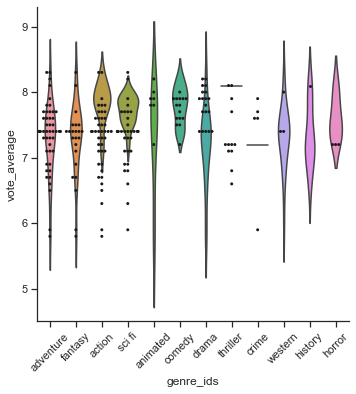

In [12]:
#Create a violin plot to display the relationship between vote averages and genres
sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x=movie_type_data["genre_ids"].astype("category") , y="vote_average", kind="violin", inner=None, data=movie_type_data)
sns.swarmplot(x="genre_ids", y="vote_average", color="k", size=3, data=movie_type_data, ax=g.ax)
g.set_xticklabels(rotation=45)

In [13]:
#conclusion
"i believe the focus of resources should be centered towards action, adventure, fantasy,sci-fi, comedy and animated movies. while animated has the highest rating the other 5 categories have higher volumes of consumer interaction therefore  "
 

'i believe the focus of resources should be centered towards action, adventure, fantasy,sci-fi, comedy and animated movies. while animated has the highest rating the other 5 categories have higher volumes of consumer interaction therefore  '